# **Short-Time Fourier Transform (STFT)**



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, fftfreq
import soundfile as sf
import IPython
import urllib.request
import io
import librosa
import random

**Generate and plot a sinusoidal signal of 2kHz frequency and 2sec duration. The signal is sampled at 8kHz.**

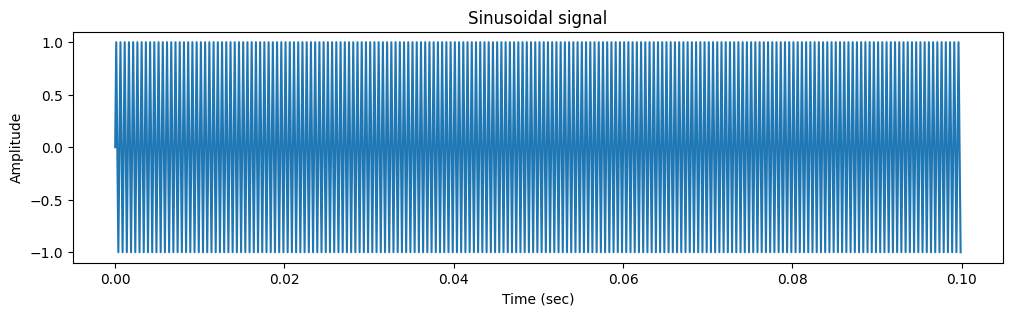

In [2]:
L_sin = 2
fs_sin = 8000
f0_sin = 2000
t_sin = np.arange(0,L_sin,1/fs_sin)
s_sin = np.sin(2*np.pi*f0_sin*t_sin)

plt.figure(figsize=(12, 3))
plt.plot(t_sin[:int(0.1*fs_sin)],s_sin[:int(0.1*fs_sin)]) # plotting first 100ms of the signal for better visualization
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('Sinusoidal signal')
plt.show()

**Perform Fourier Transform (FFT) on the sinusoidal signal.**

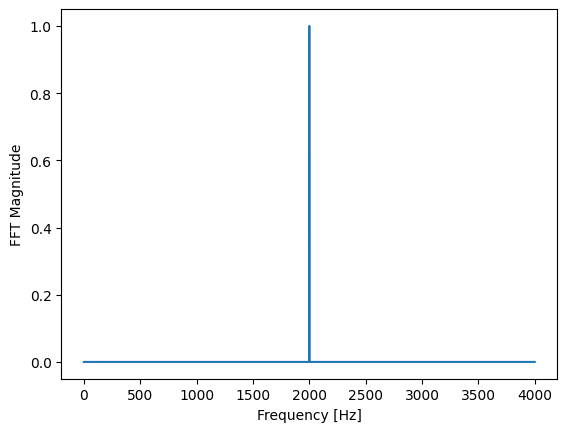

In [3]:
yf = fft(s_sin)
xf = fftfreq(len(s_sin), 1/fs_sin)[:len(s_sin)//2]

plt.figure()
plt.plot(xf, 2.0/len(s_sin) * np.abs(yf[0:len(s_sin)//2]))
plt.ylabel('FFT Magnitude')
plt.xlabel('Frequency [Hz]')
plt.show()

**Now consider a time-varying signal.**

For first 1sec, it is a sinusoid of 2kHz. For the next 1sec, it is a sinusoid of 3kHz. For the last 1sec, it is a sinusoid of 1kHz. The signal is sampled at 48kHz.

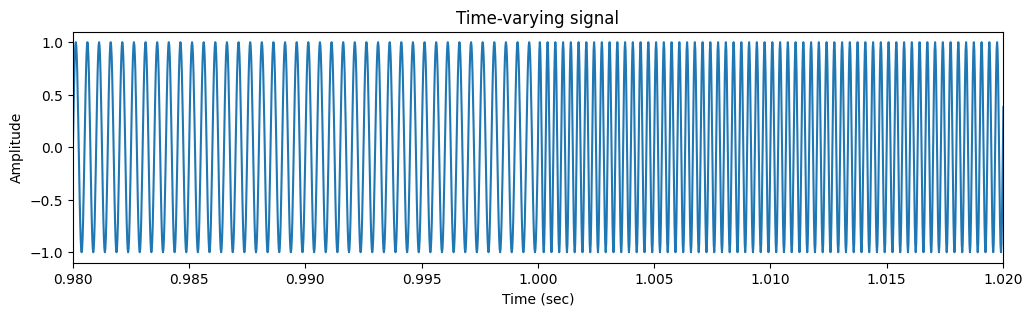

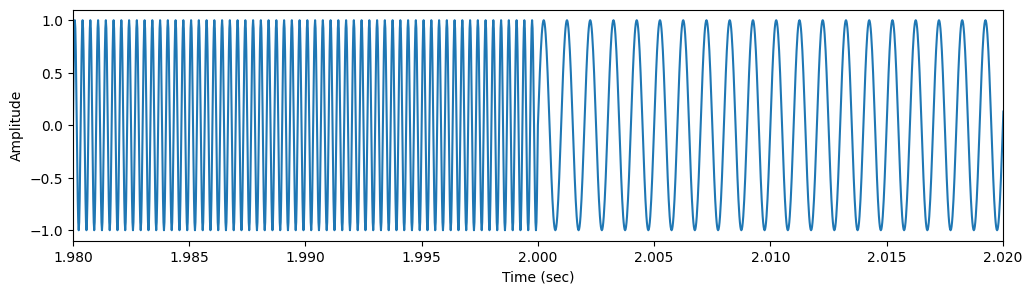

In [4]:
L_tv = 3
fs_tv = 48000
t_tv = np.arange(0,L_tv,1/fs_tv)

freq1 = 2000
freq2 = 3000
freq3 = 1000

sin1 = np.sin(2*np.pi*freq1*t_tv[t_tv<=1])
sin2 = np.sin(2*np.pi*freq2*t_tv[(t_tv>1) & (t_tv<=2)])
sin3 = np.sin(2*np.pi*freq3*t_tv[t_tv>2])
s_tv = np.concatenate((sin1, sin2, sin3))

plt.figure(figsize=(12, 3))
plt.plot(t_tv,s_tv)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('Time-varying signal')
plt.xlim(0.98, 1.02)
plt.show()

plt.figure(figsize=(12, 3))
plt.plot(t_tv,s_tv)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.xlim(1.98, 2.02)
plt.show()

**How does the FFT look for this signal?**

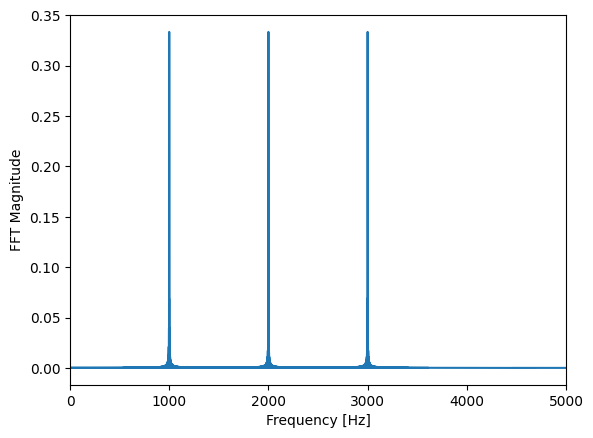

In [5]:
yf = fft(s_tv)
xf = fftfreq(len(s_tv), 1/fs_tv)[:len(s_tv)//2]

plt.figure()
plt.plot(xf, 2.0/len(s_tv) * np.abs(yf[0:len(s_tv)//2]))
plt.xlim(0, 5000)
plt.ylabel('FFT Magnitude')
plt.xlabel('Frequency [Hz]')
plt.show()

## **Short-Time Fourier Transform (STFT)**

$x[m]$: Non-stationary signal, e.g. speech

$h[m]$: Window sequence


**Windowed signal:**

$x_w^n[m] ≜ x[m]h[n-m]$

Here, $h[n-m]$: Window sequence which determines the portion of the input signal that receives emphasis at a particular time index $n$.

**STFT is defined as:**

$X[n, ω) ≜ DTFT\{x_w^n[m]\}$

i.e. $X[n, ω) = \sum_{m=-∞}^∞ x_w^n[m] e^{-jωm} = \sum_{m=-∞}^∞ x[m]h[n-m] e^{-jωm}, |ω|≤π$

**Perform STFT on the time-varying sinusoidal signal.**

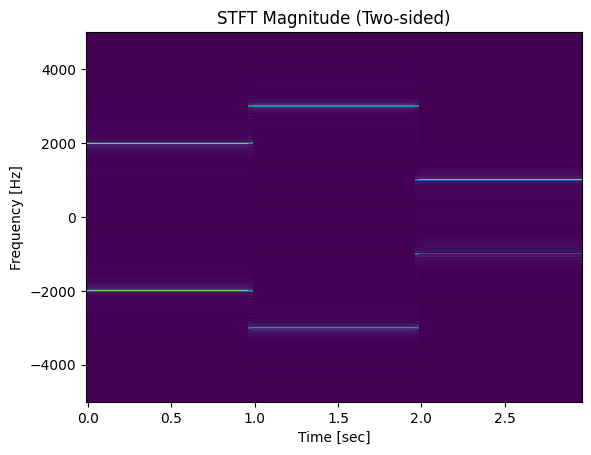

In [ ]:
win_len = round(0.05*fs_tv)
win_shift = round(0.025*fs_tv)

STFTmat = []
for i in range(0, len(s_tv)- win_len + 1, win_shift):
  win_s = s_tv[i : i+win_len]#*np.hanning(win_len)
  fft_s = fft(win_s, 4096)
  STFTmat.append(fft_s)

STFTmat = np.array(STFTmat).T
tt = np.arange(0, len(s_tv)- win_len + 1, win_shift)/fs_tv
ff = fftfreq(4096, 1/fs_tv)

plt.figure()
plt.pcolormesh(tt, np.concatenate([ff[2048:], ff[0:2048]]), np.abs(np.concatenate((STFTmat[2048:,:], STFTmat[0:2048,:]),axis=0)))
plt.title('STFT Magnitude (Two-sided)')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(-5000, 5000)
plt.show()

**Using scipy package to perform STFT**

[[ 3.16521588e-03+0.00000000e+00j -3.37359782e-16-0.00000000e+00j
  -7.76712630e-16-0.00000000e+00j ... -2.57699660e-15-0.00000000e+00j
  -1.21328391e-14-0.00000000e+00j -6.35965237e-03-0.00000000e+00j]
 [-8.44326711e-04-3.05042942e-03j -2.95751368e-07+8.18454264e-08j
  -2.95751368e-07+8.18454268e-08j ... -2.36822873e-06+6.55377157e-07j
  -2.36822874e-06+6.55377167e-07j  1.69481939e-03+6.12889685e-03j]
 [-2.71505970e-03+1.62724868e-03j -8.42059425e-08-1.40489128e-07j
  -8.42059421e-08-1.40489128e-07j ... -6.75530621e-07-1.12705476e-06j
  -6.75530613e-07-1.12705475e-06j  5.45549008e-03-3.27066089e-03j]
 ...
 [ 2.29300367e-03-2.18327280e-03j -1.51638611e-07-1.59271014e-07j
  -1.51638611e-07-1.59271014e-07j ... -1.22026326e-06-1.28168258e-06j
  -1.22026326e-06-1.28168258e-06j -4.61203296e-03+4.38979867e-03j]
 [-2.71505970e-03-1.62724868e-03j -8.42059425e-08+1.40489128e-07j
  -8.42059421e-08+1.40489128e-07j ... -6.75530621e-07+1.12705476e-06j
  -6.75530613e-07+1.12705475e-06j  5.45549008e-

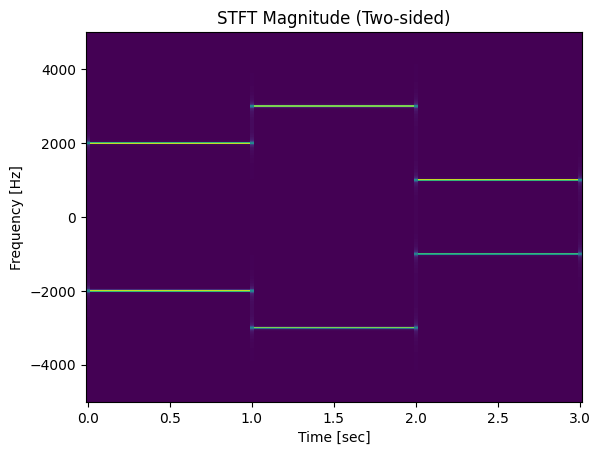

In [ ]:
from scipy import signal

ff, tt, Zxx = signal.stft(s_tv, fs_tv, window='hann', nperseg=int(0.05*fs_tv), noverlap=int(0.025*fs_tv), nfft=4096, return_onesided=False)
print(Zxx)

plt.figure()
plt.pcolormesh(tt, np.concatenate([ff[2048:], ff[0:2048]]), np.abs(np.concatenate((Zxx[2048:,:], Zxx[0:2048,:]),axis=0)))
plt.ylim(-5000, 5000)
plt.title('STFT Magnitude (Two-sided)')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

**Properties of STFT:**

If $n$ is fixed, $X[n, ω)$ is normal DTFT of $x[m]h[n-m]$. Hence, all DTFT properties hold.

(1) $X[n, ω)$ is complex-valued in general.

(2) $X[n, ω)$ is periodic in $ω$ with period $2π$.

(3) $X[n, ω)$ is conjugate symmetric w.r.t. $ω$ when $x_w^n[m]$ is real.

(4) The transform is invertible.

**One-sided output**

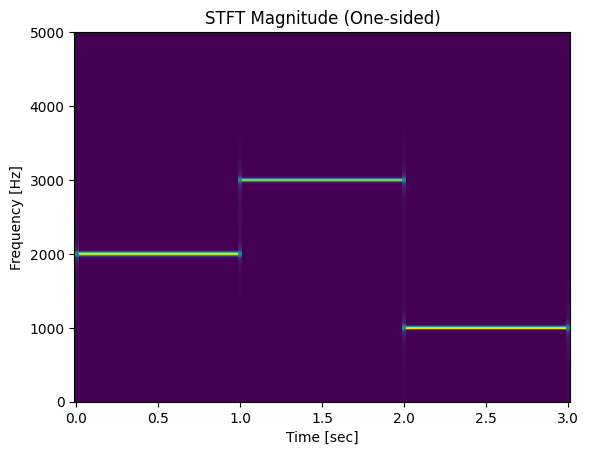

In [ ]:
from scipy import signal

ff, tt, Zxx_tv = signal.stft(s_tv, fs_tv, window='hann', nperseg=int(0.05*fs_tv), noverlap=int(0.025*fs_tv), nfft=4096, return_onesided=True)

plt.figure()
plt.pcolormesh(tt, ff, np.abs(Zxx_tv))
plt.ylim(0, 5000)
plt.title('STFT Magnitude (One-sided)')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

**STFT on the 2kHz sinusoidal signal**


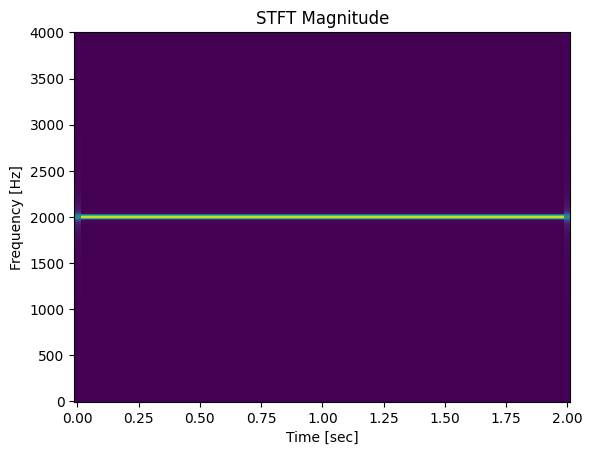

In [ ]:
ff, tt, Zxx_sin = signal.stft(s_sin, fs_sin, window='hann', nperseg=int(0.05*fs_sin), noverlap=int(0.025*fs_sin), nfft=1024, return_onesided=True)

plt.figure()
plt.pcolormesh(tt, ff, np.abs(Zxx_sin))
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

**Inverse STFT:**

$X[n, ω) ≜ DTFT\{x_w^n[m]\}$

Hence,
$x_w^n[m] = IDTFT\{X[n, ω)\}$

i.e. $x_w^n[m] = \frac{1}{2π}∫_{-π}^{\pi}X[n,ω)e^{jωm}dω$

⇒ $x[m]h[n-m] = \frac{1}{2π}∫_{-π}^{\pi}X[n,ω)e^{jωm}dω$

At $m = n$,

$x[n] = \frac{1}{2πh[0]}∫_{-π}^{\pi}X[n,ω)e^{jωm}dω$, provided $h[0] \neq 0$

If $ω$ is fixed, $X[n, ω)$ is in the form of a convolution.

**Perform inverse STFT to retrieve the 2kHz sinusoidal signal**

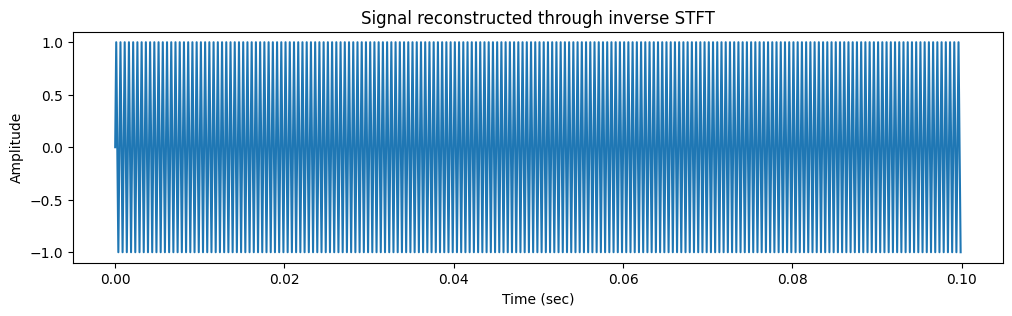

In [ ]:
t, s_inv = signal.istft(Zxx_sin, fs_sin, window='hann', nperseg=int(0.05*fs_sin), noverlap=int(0.025*fs_sin), nfft=1024, input_onesided=True)

plt.figure(figsize=(12, 3))
plt.plot(t[:int(0.1*fs_sin)],s_inv[:int(0.1*fs_sin)])  # plotting first 100ms of the signal for better visualization
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('Signal reconstructed through inverse STFT')
plt.show()

**Perform inverse STFT to retrieve the time-varying sinusoidal signal**

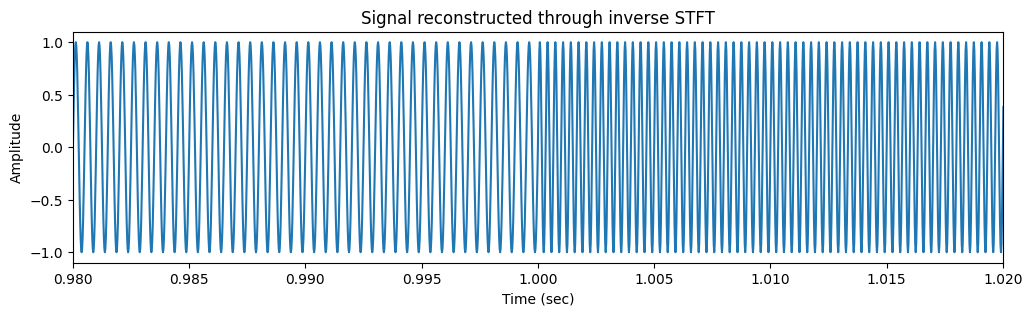

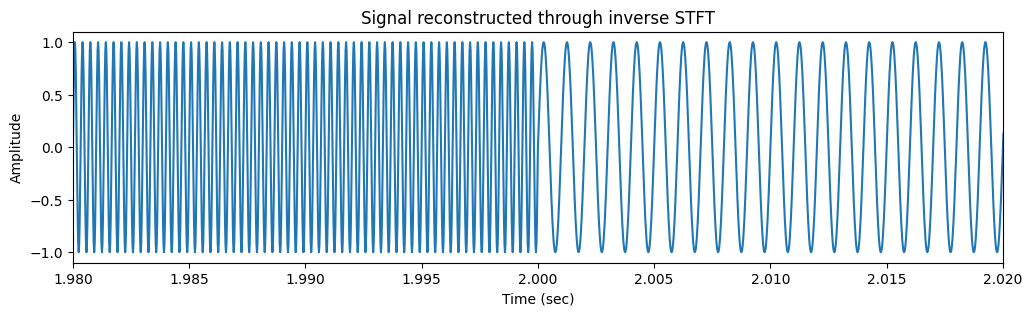

In [ ]:
t, s_inv = signal.istft(Zxx_tv, fs_tv, window='hann', nperseg=int(0.05*fs_tv), noverlap=int(0.025*fs_tv), nfft=4096, input_onesided=True)

plt.figure(figsize=(12, 3))
plt.plot(t,s_inv)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('Signal reconstructed through inverse STFT')
plt.xlim(0.98, 1.02)
plt.show()

plt.figure(figsize=(12, 3))
plt.plot(t,s_inv)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('Signal reconstructed through inverse STFT')
plt.xlim(1.98, 2.02)
plt.show()

## **Spectrogram**

A **spectrogram** is a visual representation of the spectrum of frequencies of a signal as it varies with time.

$S[n,\omega)=\left|X[n,\omega)\right|^2$

For each $n$, $S[n,\omega) ≜ DTFT\{R[n,k]\}$

where, $R[n,k]$: Short-time auto-correlation

$R[n,k] = \sum_{m=-∞}^{∞} x[m]h[n-m]x[m+k]h[n-m-k]$

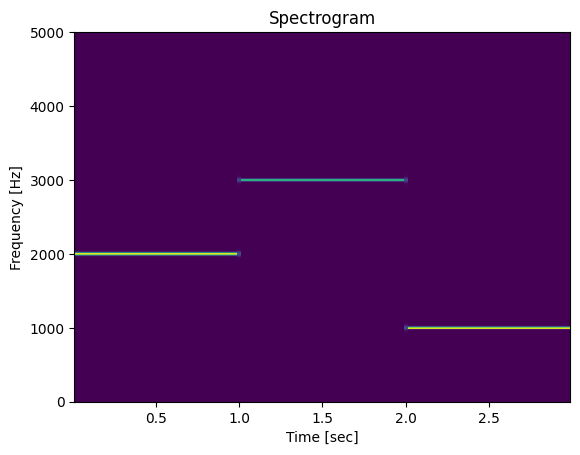

In [ ]:
f, tt, Sxx = signal.spectrogram(s_tv, fs_tv, window='hann', nperseg=int(0.05*fs_tv), noverlap=int(0.025*fs_tv), nfft=4096, return_onesided=True)

plt.figure()
plt.pcolormesh(tt, f, Sxx)
plt.title('Spectrogram')
plt.ylim(0, 5000)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

**Now, let us slowly modulate the frequency of the sinusoid around 2kHz.**
The signal is 10 sec long and sampled at 8 kHz.

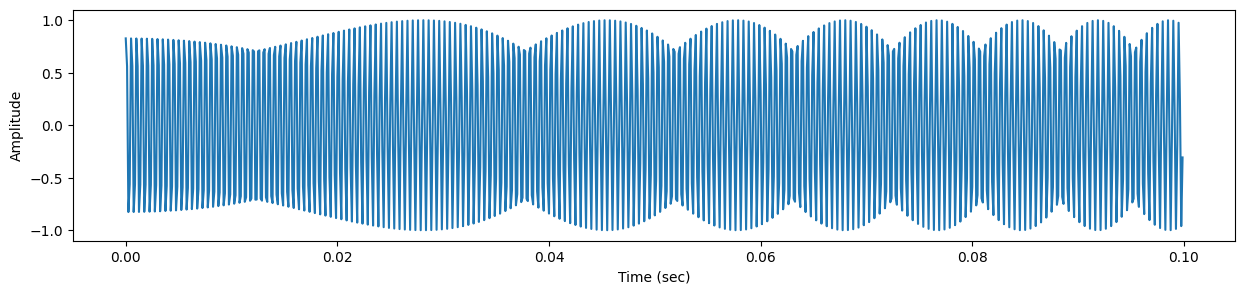

In [ ]:
L = 10
fs = 8000
f0 = 2000
t = np.arange(0,L,1/fs)
mod = 1000*np.cos(2*np.pi*0.25*t)
s = np.sin(2*np.pi*f0*t + mod)

plt.figure(figsize=(15, 3))
plt.plot(t[:int(0.1*fs)],s[:int(0.1*fs)])  # plotting first 100ms of the signal for better visualization
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

**Obtain the spectrogram.**

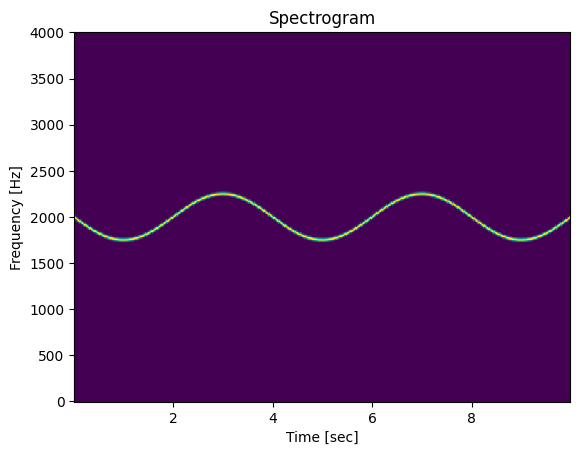

In [ ]:
f, tt, Sxx = signal.spectrogram(s, fs, window='hann', nperseg=int(0.05*fs), noverlap=int(0.025*fs), nfft=1024, return_onesided=True)

plt.figure()
plt.pcolormesh(tt, f, Sxx)
plt.title('Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

**Load and visualize a speech signal.**

--2024-01-22 06:43:33--  https://github.com/Tanuka92/SPP_demo_files/raw/main/SX24.WAV
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Tanuka92/SPP_demo_files/main/SX24.WAV [following]
--2024-01-22 06:43:33--  https://raw.githubusercontent.com/Tanuka92/SPP_demo_files/main/SX24.WAV
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70042 (68K) [audio/wav]
Saving to: ‘SX24.WAV’

SX24.WAV            100%[===================>]  68.40K  --.-KB/s    in 0.01s   

2024-01-22 06:43:33 (5.96 MB/s) - ‘SX24.WAV’ saved [70042/70042]



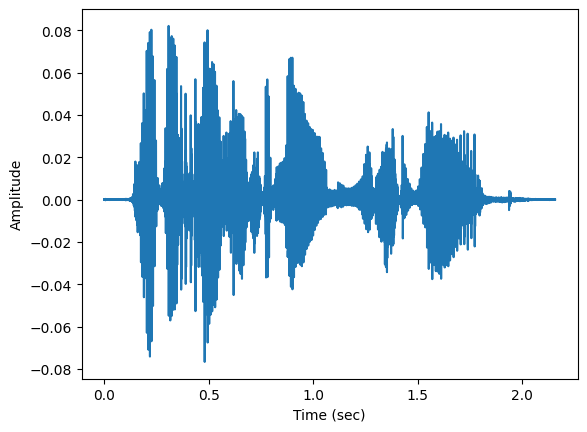

In [ ]:
!wget https://github.com/Tanuka92/SPP_demo_files/raw/main/SX24.WAV

wav, fs = sf.read('/content/SX24.WAV')

plt.plot(np.arange(0,len(wav)/fs,1/fs), wav)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

IPython.display.Audio(data=wav, rate=fs)

# **Wideband and Narrowband Spectrogram**

**Wideband** spectrograms provide better **temporal resolution**, while **narrowband** spectrograms provide better **resolution in the frequency domain**.

A **Wideband** spectrogram is computed using a short segment length in the time domain, e.g. 5-10ms. It shows **vertical striations**.

A **Narrowband** spectrogram is computed using a longer segment length in the time domain. It shows **horizontal striations**.

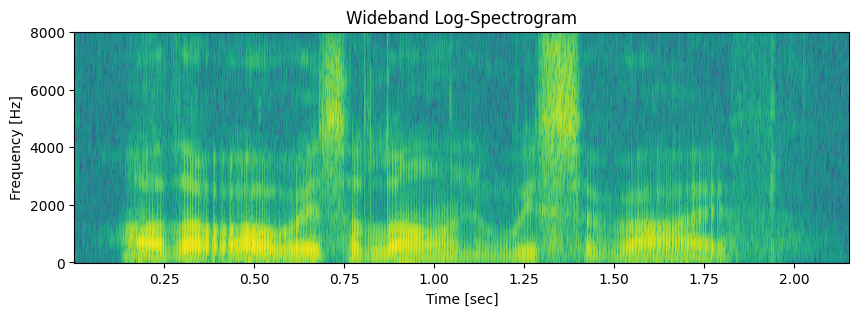

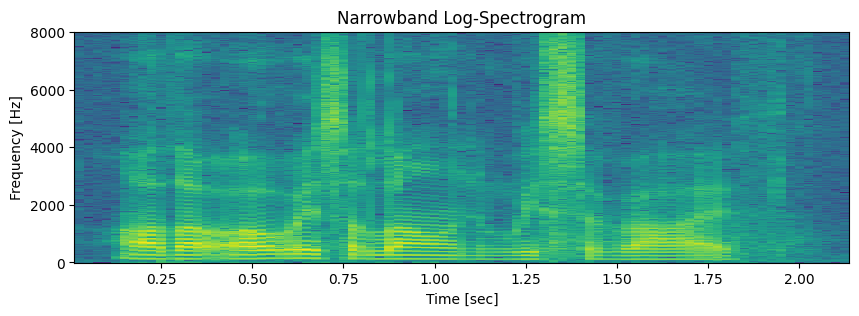

In [ ]:
f, tt, Sxx = signal.spectrogram(wav, fs, window='hann', nperseg=int(0.005*fs), noverlap=int(0.0025*fs), nfft=1024, return_onesided=True)

plt.figure(figsize=(10,3))
plt.pcolormesh(tt, f, np.log(Sxx))
plt.title('Wideband Log-Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


f, tt, Sxx = signal.spectrogram(wav, fs, window='hann', nperseg=int(0.05*fs), noverlap=int(0.025*fs), nfft=1024, return_onesided=True)

plt.figure(figsize=(10,3))
plt.pcolormesh(tt, f, np.log(Sxx))
plt.title('Narrowband Log-Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# **Reconstruct signal from spectrogram or $|X[n,ω)|$**

**Griffin-Lim Algorithm**

GLA is an iterative algorithm where the squared error between the given $|X[n,ω)|$ and the $\left|\mathrm{STFT}\right|$ of the estimated signal is decreased over iterations.


Given $|X[n,ω)|$.

1. Let $x^i[n]$ denote the estimated signal at iteration i.

2. Obtain $\mathrm{X}^i[n,\omega) = STFT(x^i[n])$

3. Replace $\left|\mathrm{X}^i[n,\omega)\right| = |X[n,ω)|$

4. Find $x^{i+1}[n]$ such that its STFT is closest to the modified $\mathrm{X}^i[n,\omega)$

More details can be found at https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=1164317

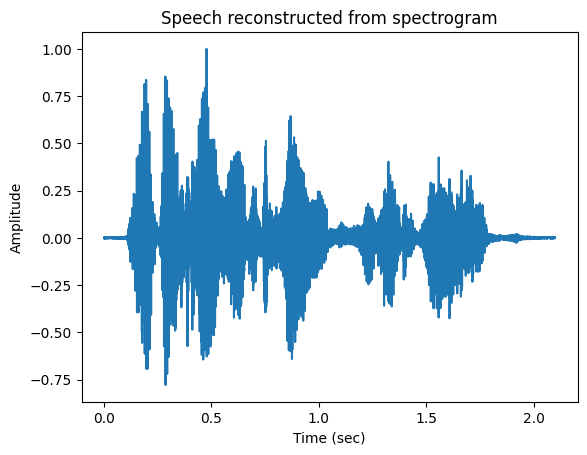

In [ ]:
y = librosa.griffinlim(np.sqrt(Sxx), hop_length=int(0.025*fs), win_length=int(0.05*fs))

plt.plot(np.arange(0,len(y)/fs,1/fs), y/max(abs(y)))
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('Speech reconstructed from spectrogram')
plt.show()

IPython.display.Audio(data=y/max(abs(y)), rate=fs)

# **Reconstruction of signal from distorted spectrogram**

**1. Make time-frames 0**

(513, 85)


<ipython-input-24-9c34bf86515e>:9: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(tt, f, np.log(Sxx))


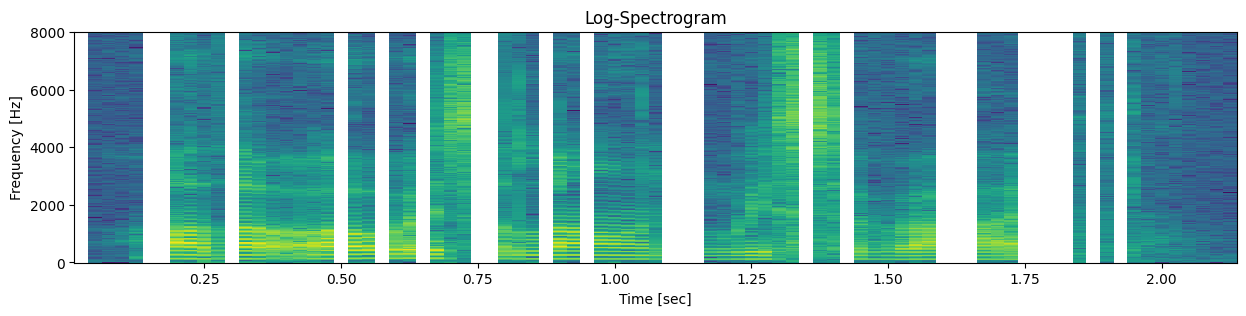

In [ ]:
f, tt, Sxx = signal.spectrogram(wav, fs, window='hann', nperseg=int(0.05*fs), noverlap=int(0.025*fs), nfft=1024, return_onesided=True)

#idx = random.sample(range(0, Sxx.shape[1]), int(0.3*Sxx.shape[1]))

Sxx[:,30:60] = 0

plt.figure(figsize=(15,3))
plt.pcolormesh(tt, f, np.log(Sxx))
plt.title('Log-Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

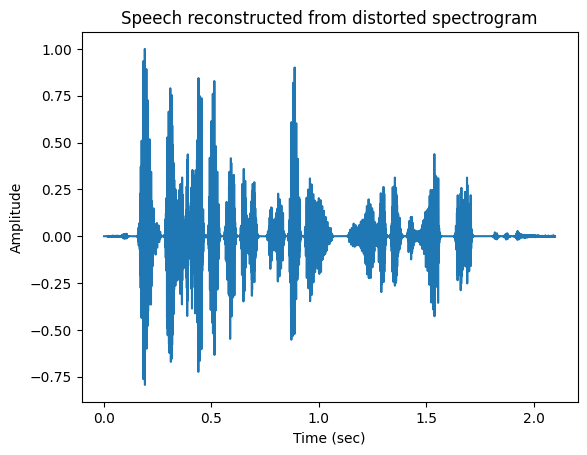

In [ ]:
y = librosa.griffinlim(np.sqrt(Sxx), hop_length=int(0.025*fs), win_length=int(0.05*fs))

plt.plot(np.arange(0,len(y)/fs,1/fs), y/max(abs(y)))
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('Speech reconstructed from distorted spectrogram')
plt.show()

IPython.display.Audio(data=y/max(abs(y)), rate=fs)

**2. Make frequency bins 0**

<ipython-input-26-757a5547b5bd>:8: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(tt, f, np.log(Sxx))


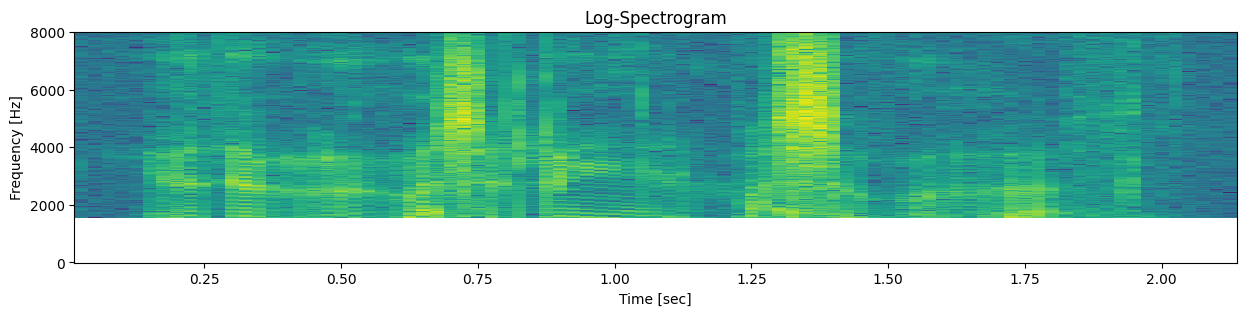

In [ ]:
f, tt, Sxx = signal.spectrogram(wav, fs, window='hann', nperseg=int(0.05*fs), noverlap=int(0.025*fs), nfft=1024, return_onesided=True)

#idx = random.sample(range(0, Sxx.shape[0]), int(0.5*Sxx.shape[0]))

Sxx[0:100,:] = 0

plt.figure(figsize=(15,3))
plt.pcolormesh(tt, f, np.log(Sxx))
plt.title('Log-Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

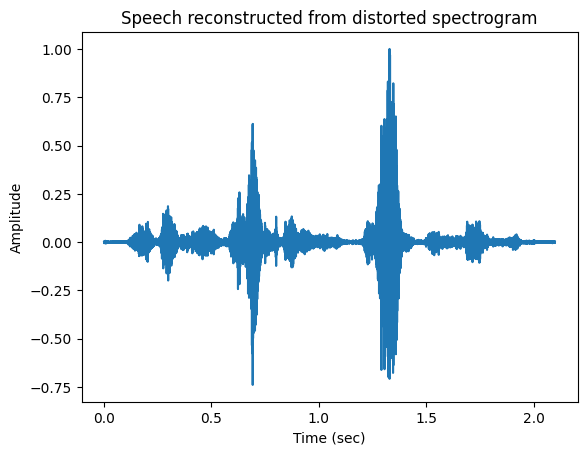

In [ ]:
y = librosa.griffinlim(np.sqrt(Sxx), hop_length=int(0.025*fs), win_length=int(0.05*fs))

plt.plot(np.arange(0,len(y)/fs,1/fs), y/max(abs(y)))
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('Speech reconstructed from distorted spectrogram')
plt.show()

IPython.display.Audio(data=y/max(abs(y)), rate=fs)

**3. Replace time-frames by uniformly distributed random noise**

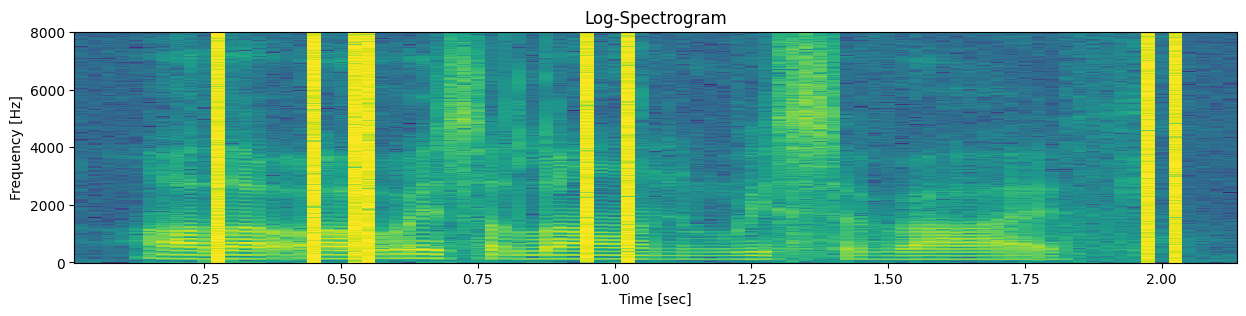

In [ ]:
f, tt, Sxx = signal.spectrogram(wav, fs, window='hann', nperseg=int(0.05*fs), noverlap=int(0.025*fs), nfft=1024, return_onesided=True)

idx = random.sample(range(0, Sxx.shape[1]), int(0.1*Sxx.shape[1]))

Sxx[:,idx] = np.random.uniform(np.min(Sxx), np.max(Sxx), (Sxx.shape[0],len(idx)))

plt.figure(figsize=(15,3))
plt.pcolormesh(tt, f, np.log(Sxx))
plt.title('Log-Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

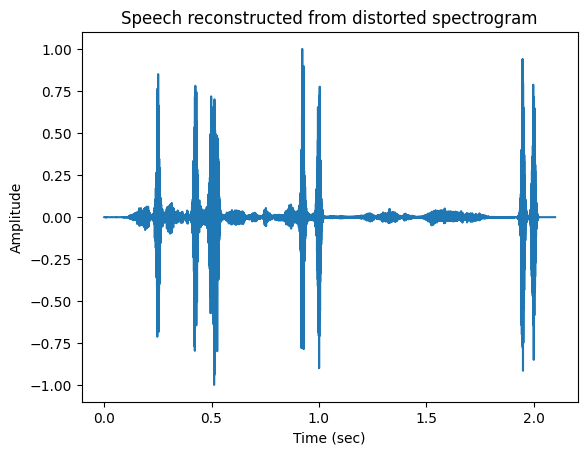

In [ ]:
y = librosa.griffinlim(np.sqrt(Sxx), hop_length=int(0.025*fs), win_length=int(0.05*fs))

plt.plot(np.arange(0,len(y)/fs,1/fs), y/max(abs(y)))
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('Speech reconstructed from distorted spectrogram')
plt.show()

IPython.display.Audio(data=y/max(abs(y)), rate=fs)

**4. Replace frequency bins by uniformly distributed random noise**

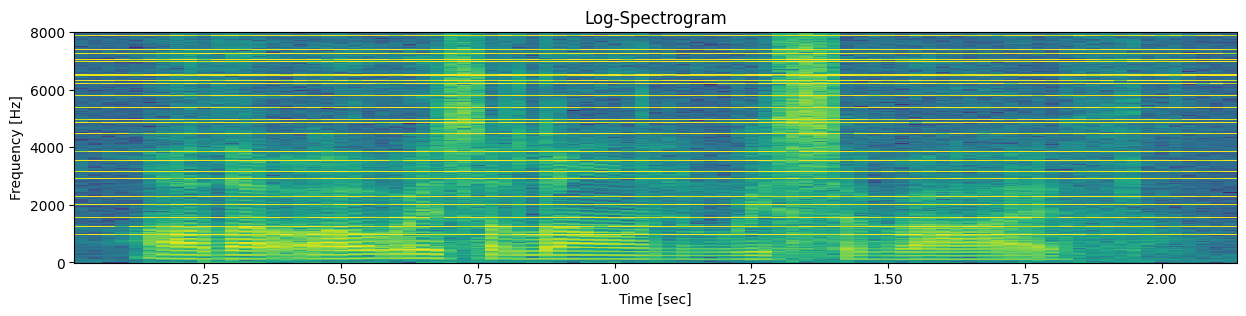

In [ ]:
f, tt, Sxx = signal.spectrogram(wav, fs, window='hann', nperseg=int(0.05*fs), noverlap=int(0.025*fs), nfft=1024, return_onesided=True)

idx = random.sample(range(0, Sxx.shape[0]), int(0.1*Sxx.shape[0]))

Sxx[idx,:] = np.random.uniform(np.min(Sxx), np.max(Sxx), (len(idx),Sxx.shape[1]))

plt.figure(figsize=(15,3))
plt.pcolormesh(tt, f, np.log(Sxx))
plt.title('Log-Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

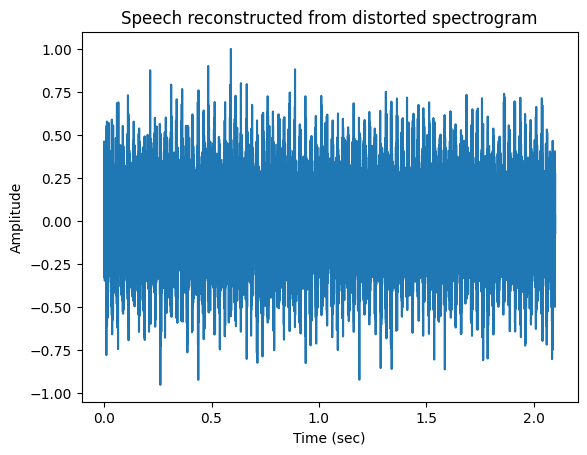

In [ ]:
y = librosa.griffinlim(np.sqrt(Sxx), hop_length=int(0.025*fs), win_length=int(0.05*fs))

plt.plot(np.arange(0,len(y)/fs,1/fs), y/max(abs(y)))
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('Speech reconstructed from distorted spectrogram')
plt.show()

IPython.display.Audio(data=y/max(abs(y)), rate=fs)